In [10]:
from tensorflow.keras.models import load_model





In [11]:
model = load_model("model.h5")

In [12]:
from PIL import Image, ImageChops, ImageEnhance
import os

def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file.jpg'
    ela_filename = 'temp_ela_file.png'

    # Open and save the image with the specified quality
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality=quality)

    # Open the saved image and compute the ELA image
    temp_image = Image.open(temp_filename)
    ela_image = ImageChops.difference(image, temp_image)
    
    # Get the extrema and scale the ELA image
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff

    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    # Clean up temporary files
    os.remove(temp_filename)

    return ela_image


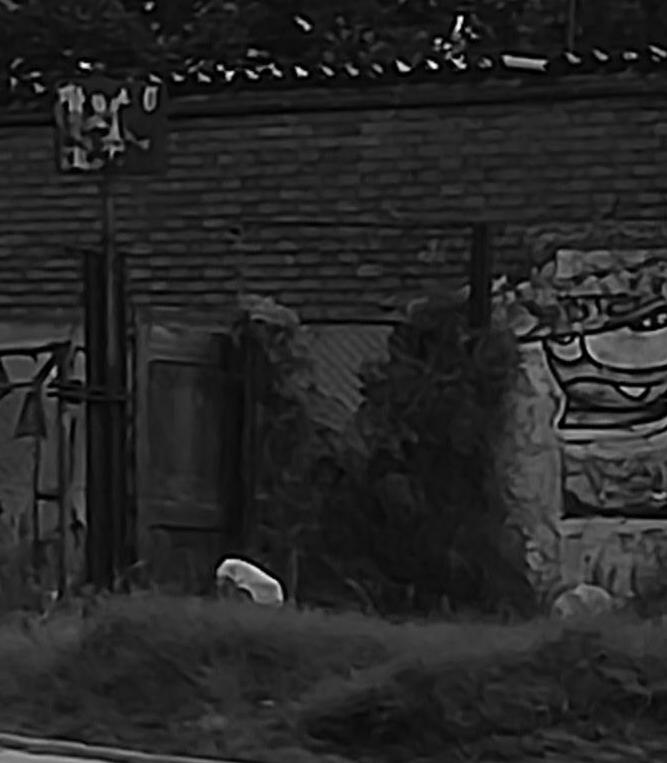

In [13]:
real_image_path = r"C:\Users\tangu\Downloads\mini\TRAINING_CG-1050\TRAINING\ORIGINAL\authenticated1.jpg" 
Image.open(real_image_path)

In [14]:
image_size = (128, 128)

def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 85).resize(image_size)).flatten()


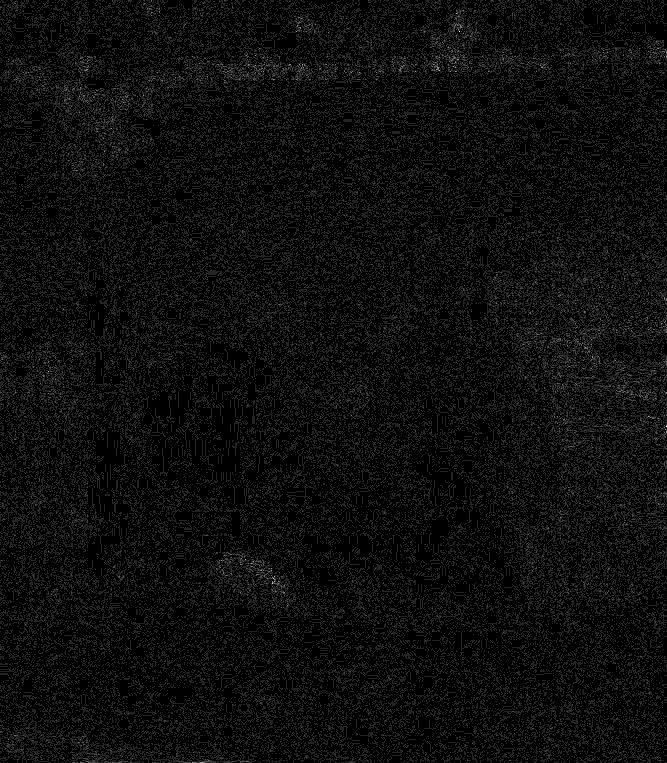

In [15]:
convert_to_ela_image(real_image_path, 85)

In [16]:
import numpy as np
path= r"C:\Users\tangu\Downloads\mini\VALIDATION_CG-1050\VALIDATION\ORIGINAL\0090.jpg" 
x2 = prepare_image(path)
x2 = x2.reshape(-1, 128, 128, 3)
x2


array([[[[27, 27, 27],
         [ 8,  8,  8],
         [25, 25, 25],
         ...,
         [15, 15, 15],
         [39, 39, 39],
         [15, 15, 15]],

        [[13, 13, 13],
         [17, 17, 17],
         [18, 18, 18],
         ...,
         [17, 17, 17],
         [ 6,  6,  6],
         [15, 15, 15]],

        [[17, 17, 17],
         [ 6,  6,  6],
         [20, 20, 20],
         ...,
         [32, 32, 32],
         [14, 14, 14],
         [25, 25, 25]],

        ...,

        [[15, 15, 15],
         [ 0,  0,  0],
         [ 8,  8,  8],
         ...,
         [37, 37, 37],
         [46, 46, 46],
         [17, 17, 17]],

        [[15, 15, 15],
         [ 0,  0,  0],
         [31, 31, 31],
         ...,
         [43, 43, 43],
         [45, 45, 45],
         [36, 36, 36]],

        [[18, 18, 18],
         [ 6,  6,  6],
         [11, 11, 11],
         ...,
         [16, 16, 16],
         [16, 16, 16],
         [ 6,  6,  6]]]], dtype=uint8)

In [17]:
arr = model.predict(x2)
print(arr)

if arr[0][0] > arr[0][1]:
    print("IMAGE IS TAMPERED")
else:
    print("IMAGE IS AUTHENTICATED")

1/1 [==============================] - 0s 263ms/step
[[0.35974535 0.6402546 ]]
IMAGE IS AUTHENTICATED
